# Worksheet 1

Welcome to worksheet 1! This worksheet is designed to allow you to practice what was covered in the assigned readings & lectures/recordings. You are allowed to collaborate with a group (eg: folks sitting next to you in class) of up to 4 students. You all are supposed to make an individual submission in canvas, and please make sure to write the names of the people you collaborated with as a comment when you submit your work to Canvas.

This optional worksheet will be marked on a 0/1/2 point scale based on effort and completion.

***Worksheets are due with milestones and must be submitted as `.ipynb`, `.html`, and any other screenshot images (Please don't upload a folder or a zipped folder).***

## Mechanics

- [ ] Upload `.ipynb`, `.html`, and any other screenshots asked for directly to canvas. (you should upload both `.ipynb` and `.html` file.)
- [ ] Screenshots and code output rendered correctly.
- [ ] Credentials (if any) not exposed in the notebook.

***Question 1:*** You can take up any one challenge for this class exercise. 

- You can work on a ~5 GB parquet file (CSV was ~30 GB) with ~1.5 Billion rows. You can download the dataset [here](https://figshare.com/ndownloader/files/34513307).

- You can work on a ~10 GB parquet file (CSV was ~60 GB) with ~2.5 Billion rows. You can download the dataset [here](https://figshare.com/ndownloader/files/34513310).

> ***Note:*** You want to unzip the file.

If you don't want to take up the challenge, you can use the ~500 MB parquet file (CSV was ~3 GB) with ~9 Million rows that you converted in our last class. 

We are working on the same data, and schema you can find [here](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture1.html#memory)

***Question:***
We are interested in knowing the mean departure delays (DepDelay) of each airline carrier that flew from  O'Hare International Airport (ORD) to Philadelphia International Airport (PHL) in the year 2002. 

- You can do this either in R or python.
- You probably want to do a GROUP BY.
- Refer [this](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture2.html#why-not-use-parquet) section in this lecture for more details.

In [2]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd

In [5]:
%cd "/Users/kw/Documents/MDS/dsci525_web_cloud_computing/worksheet1/data/"
output_directory = "depdelay/"
os.makedirs(output_directory, exist_ok=True)

/Users/kw/Documents/MDS/dsci525_web_cloud_computing/worksheet1/data


In [7]:
# %%time
# with zipfile.ZipFile(os.path.join("combined_data_partition.big5.parquet.zip"), 'r') as f:
#     f.extractall(output_directory)

CPU times: user 28.8 s, sys: 3.89 s, total: 32.7 s
Wall time: 33.4 s


In [9]:
%%time
filepathparquet = "depdelay/combined_data_partition.big5.parquet/year=2002"

df = pd.read_parquet(
    filepathparquet,
    filters=[('Origin', '==', 'ORD'), ('Dest', '==', 'PHL')],
    columns=["UniqueCarrier", "DepDelay"]
)

CPU times: user 19.8 s, sys: 2.95 s, total: 22.8 s
Wall time: 3.71 s


In [10]:
df.head()

,UniqueCarrier,DepDelay
0,AA,6.0
1,AA,56.0
2,AA,54.0
3,AA,6.0
4,AA,4.0


In [11]:
df.groupby("UniqueCarrier").mean().round(3)

,DepDelay
UniqueCarrier,
AA,14.071
UA,15.739
US,16.956


(OPTIONAL) ***Question 2:*** Set up your AWS lab. You can refer to this [3.5. AWS lab setup](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture3.html#aws-lab-setup)

For tomorrow's tutorial, this is going to be helpful. So make sure you have [3.5. AWS lab setup](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture3.html#aws-lab-setup) done. Then, rest TA will guide you through.

Take a screenshot of your lab canvas page like the one below and put it in your worksheet folder in github;
https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/_images/awslab.png


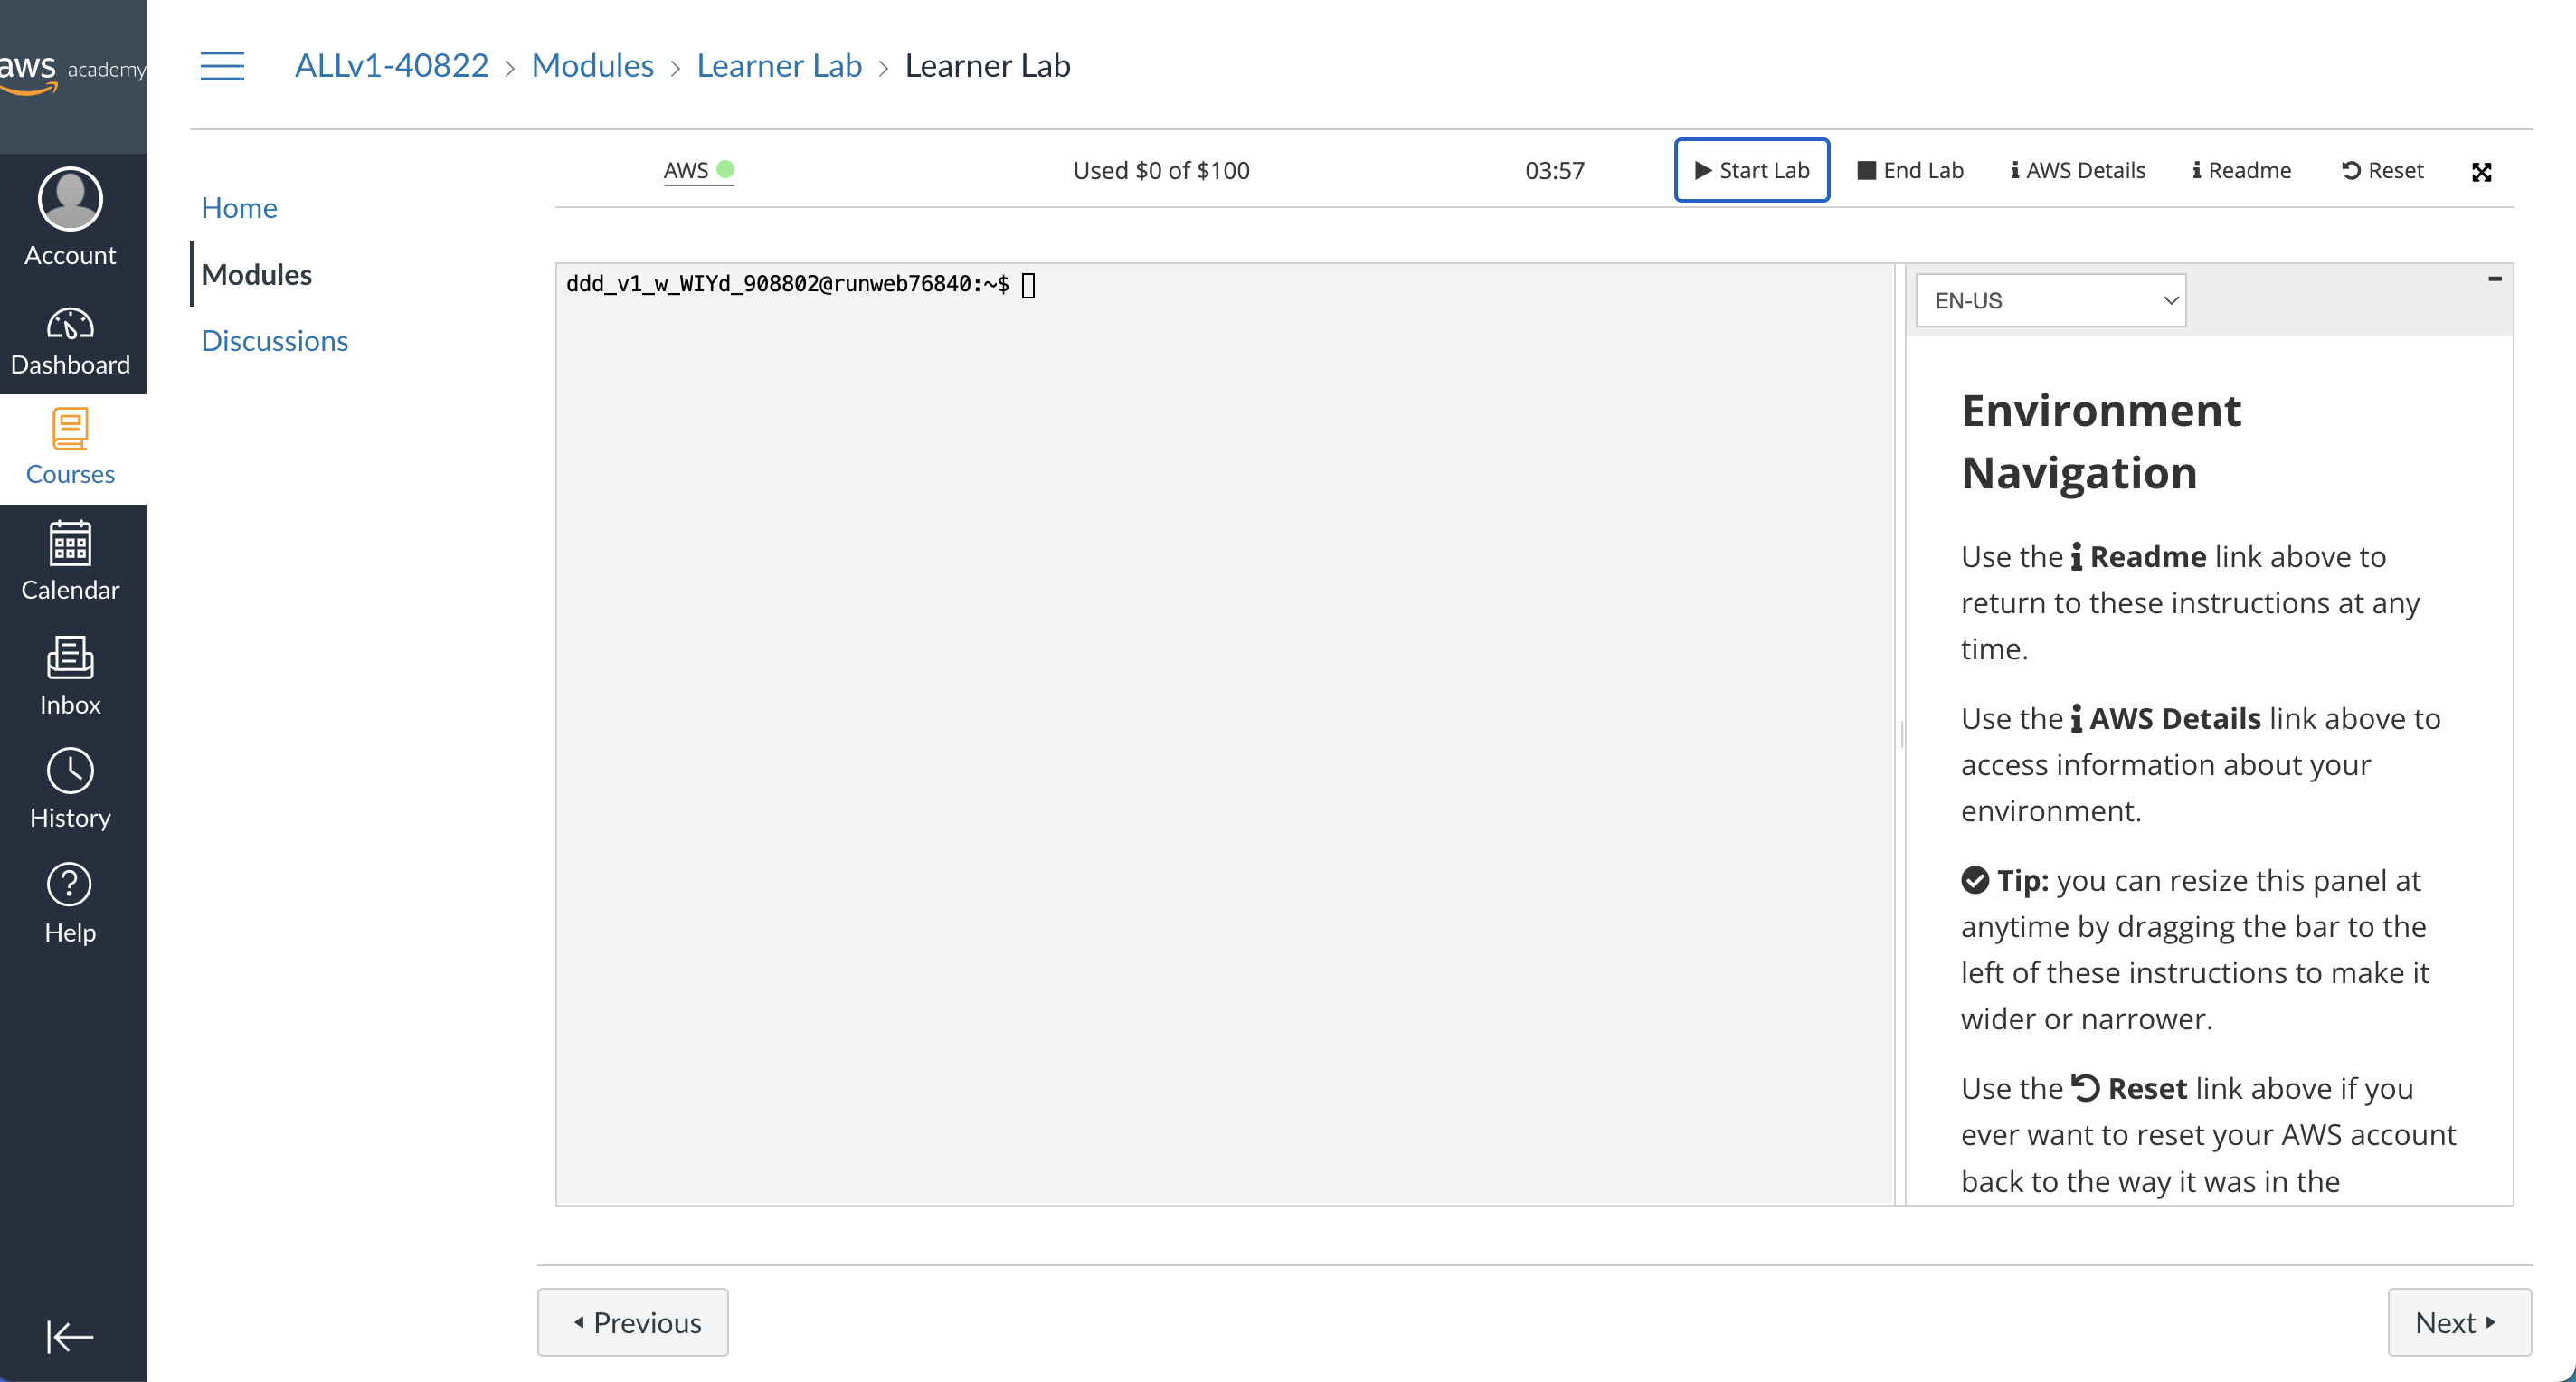